In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import math

In [3]:
df=pd.read_csv("c://j-works22/works/data/rate_10.csv")
y=df['kr_10']
x=df['tnote_10']
n=len(y)

In [4]:
pi=math.pi

# Chebyshev basis functions: up to the 4th-order
def basis1(x):
  return math.sqrt(2)*math.cos(pi*(x-0.5)/n)
def basis2(x):
  return math.sqrt(2)*math.cos(2*pi*(x-0.5)/n)
def basis3(x):
  return math.sqrt(2)*math.cos(3*pi*(x-0.5)/n)
def basis4(x):
  return math.sqrt(2)*math.cos(4*pi*(x-0.5)/n)

In [7]:
z1=np.zeros([n,1])
z2=np.zeros([n,1])
z3=np.zeros([n,1])
z4=np.zeros([n,1])

for t in range(n):
   z1[t]= basis1(t)*x[t]
   z2[t]= basis2(t)*x[t]
   z3[t]= basis3(t)*x[t]
   z4[t]= basis4(t)*x[t]

In [19]:
ols=smf.ols('y~x+z1+z2+z3+z4', data=df).fit()
bhat=ols.params
a=bhat[0]
b=bhat[1]
d1=bhat[2]
d2=bhat[3]
d3=bhat[4]
d4=bhat[5]
# ols.summary()

In [16]:
beta=np.zeros([n,1])

for t in range(n):
      beta[t]= b + basis1(t)*d1 + basis2(t)*d2 + basis3(t)*d3 + basis4(t)*d4
     
# print(beta)

Text(0.5, 1.0, 'Reationship between Korea yield of treasury bond(10yr) and T/Note yield(10yr)')

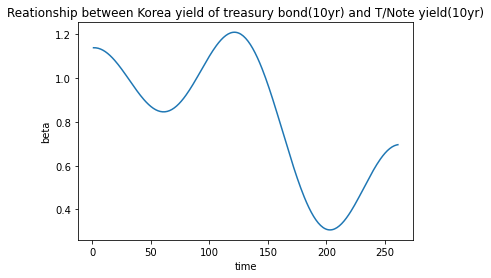

In [17]:
seqa=[ i for i in range(1, n+1)]
plt.plot(seqa, beta)
plt.xlabel('time')
plt.ylabel('beta')
plt.title('Reationship between Korea yield of treasury bond(10yr) and T/Note yield(10yr)')